In [1]:
import pandas as pd
import sklearn.model_selection 
import numpy as np 
import seaborn as sns
import category_encoders as ce 

In [2]:
#reading in data
pd.set_option('display.max_columns', 500)
df = pd.read_csv('listings (1).csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Connor's feature cleaning 
#cleaning 'price' feature and adding it to 'cleaning fee' 

df['price'] = df['price'].str.strip('$')
df['cleaning_fee'] = df['cleaning_fee'].str.strip('$')

In [4]:
df['price'] = df['price'].str.replace(',', '')
df['cleaning_fee'] = df['cleaning_fee'].str.replace(',', '')

In [5]:
df['price'] = df['price'].astype(float)
df['cleaning_fee'] = df['cleaning_fee'].astype(float)


In [6]:
df['cleaning_fee'] = df['cleaning_fee'].replace(np.nan, 0)

In [7]:
df['total_price'] = df['price'] + df['cleaning_fee']

In [8]:
df = df.drop(['price', 'cleaning_fee'], axis=1)

In [9]:
df.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,total_price
0,20862235,https://www.airbnb.com/rooms/20862235,20190505154550,2019-05-05,"Spacious studio in great, walkable location",This beautiful and spacious studio apartment i...,NaN,This beautiful and spacious studio apartment i...,none,NaN,"Tenants park on the street, and we may provide...",Close to public transit!,NaN,NaN,- We kindly ask all tenants to please respect ...,NaN,NaN,https://a0.muscache.com/im/pictures/0b1d82ed-a...,NaN,58360256,https://www.airbnb.com/users/show/58360256,Amber,2016-02-11,"Santa Monica, California, United States","Hello, my name is Amber, and I assist the prop...",within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/9a40a...,https://a0.muscache.com/im/pictures/user/9a40a...,Santa Monica,29.0,29.0,"['email', 'phone', 'reviews']",t,f,"Santa Monica, CA, United States",Santa Monica,Santa Monica,NaN,Santa Monica,CA,90402,Los Angeles,"Santa Monica, CA",US,United States,34.02658,-118.50118,t,Apartment,Entire home/apt,2,1.0,0.0,2.0,Real Bed,"{TV,Wifi,Kitchen,""Pets allowed"",""Free street p...",NaN,NaN,NaN,"$1,000.00",2,$10.00,31,1125,31,31,1125,1125,31.0,1125.0,2 weeks ago,t,3,33,63,338,2019-05-05,6,4,2017-11-11,2019-03-03,100.0,10.0,9.0,10.0,10.0,10.0,10.0,t,NaN,"{""Santa Monica""}",f,f,strict_14_with_grace_period,f,f,29,29,0,0,0.33,225.0


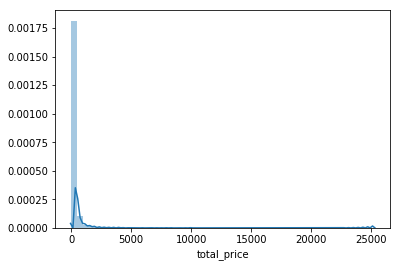

In [10]:
#right skewed, will log transform 
sns.distplot(df['total_price']);

In [11]:
df = df.drop(['summary', 'space', 'description', 'neighborhood_overview',
         'notes', 'transit', 'access', 'interaction', 'house_rules',
         'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_location',
         'host_about', 'host_acceptance_rate', 'host_response_time', 'host_response_rate', 
         'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',  
         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',                           
         'review_scores_value', 'requires_license', 'reviews_per_month', 'first_review', 'last_review',
         'license', 'jurisdiction_names','host_neighbourhood', 'neighbourhood', 
         'neighbourhood_group_cleansed', 'security_deposit', 'monthly_price', 'square_feet', 'weekly_price'], axis=1)


In [12]:
pd.set_option('display.max_rows', 500)
df.isna().sum().head()

id              0
listing_url     0
scrape_id       0
last_scraped    0
name            4
dtype: int64

In [13]:
df['bathrooms'] = df['bathrooms'].fillna(value=np.mean(df['bathrooms']))
df['bedrooms'] = df['bedrooms'].fillna(value=np.mean(df['bedrooms']))
df['beds'] = df['beds'].fillna(value=np.mean(df['beds']))

In [14]:
df= df.dropna()

In [15]:
target = ['total_price']

df_features = df.drop(['total_price'], axis=1)
df_target = df[target]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.2)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((34665, 67), (34665, 1), (8667, 67), (8667, 1))

In [18]:
def log_transform(y_train, y_test):
    y_train = y_train.copy()
    y_test = y_test.copy()
    
    y_train = np.log(y_train)
    y_test = np.log(y_test)
    return y_train, y_test

In [19]:
y_train, y_test = log_transform(y_train, y_test)
y_train.shape, y_test.shape

((34665, 1), (8667, 1))

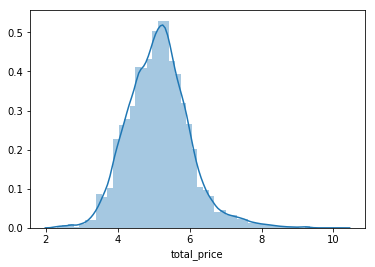

In [20]:
#'total_price' now more akin to a normal dist as expected 
sns.distplot(y_train['total_price']);

In [21]:
def encode(X_train, X_test):
    X_train = X_train.copy()
    X_test = X_test.copy()
    
    encode = ce.OrdinalEncoder()
    X_train = encode.fit_transform(X_train)
    X_test = encode.fit_transform(X_test)
    
    return X_train, X_test 

In [22]:
X_train, X_test = encode(X_train, X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34665, 67), (8667, 67), (34665, 1), (8667, 1))

In [23]:
X_train.head(1)

,id,listing_url,scrape_id,last_scraped,name,experiences_offered,picture_url,host_id,host_url,host_name,host_since,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
29720,13550830,1,20190505154550,1,1,1,1,14488107,1,1,1,1,1,1,9.0,9.0,1,1,1,1,1,1,1,1,1,1,1,1,34.17241,-118.40866,1,1,1,5,1.0,2.0,3.0,1,1,1,1,4,1125,4,4,1125,1125,4.0,1125.0,1,1,7,7,7,76,1,16,3,1,1,1,1,1,9,9,0,0


In [24]:
X_train.describe()

,id,listing_url,scrape_id,last_scraped,name,experiences_offered,picture_url,host_id,host_url,host_name,host_since,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,3.466500e+04,34665.000000,3.466500e+04,34665.000000,34665.000000,34665.0,34665.000000,3.466500e+04,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.0,34665.0,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.0,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.0,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000,34665.000000
mean,2.002849e+07,17333.000000,2.019051e+13,1.474715,16986.498803,1.0,16866.628386,7.212316e+07,8572.781826,1780.411654,1251.396365,1.714294,8542.938555,8542.938555,10.700995,10.700995,40.718246,1.001414,1.568152,15.172335,57.403375,14.921044,1.002164,125.678725,1.069061,15.172335,1.0,1.0,34.054486,-118.325968,1.208077,3.809808,1.410933,3.655560,1.444249,1.418287,1.959002,1.032829,15826.090466,1.936507,5.105669,5.500188,667.792702,5.323756,5.954738,665.902466,667.836665,5.676351,667.110896,14.078927,1.0,12.061157,26.922660,43.030319,159.792817,1.474715,31.544267,13.491014,1.461878,1.0,1.887120,1.017510,1.025126,5.816818,3.974268,1.256397,0.586153
std,9.898934e+06,10007.067877,7.476670e+00,0.499483,9880.040108,0.0,9844.307984,7.349006e+07,6382.272430,1958.268177,835.073880,0.451757,6373.340477,6373.340477,57.212876,57.212876,60.265406,0.037571,0.495341,34.938298,46.150346,33.539958,0.078726,110.537523,0.499037,34.938298,0.0,0.0,0.116040,0.152808,0.405938,3.483870,0.567335,2.625037,0.928753,1.090237,1.645089,0.318421,9549.797655,1.749709,8.159146,23.430491,5427.566855,23.265278,23.991510,5427.601382,5427.554831,23.566215,5427.548990,14.741575,0.0,11.288923,22.476563,33.751106,133.865804,0.499483,56.584473,20.601559,0.498552,0.0,0.871228,0.131165,0.156511,12.774558,12.019355,3.167260,3.722824
min,1.090000e+02,1.000000,2.019051e+13,1.000000,1.000000,1.0,1.000000,5.900000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,33.338480,-118.934220,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.287216e+07,8667.000000,2.019051e+13,1.000000,8409.000000,1.0,8302.000000,1.108294e+07,2812.000000,29

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
model = RandomForestRegressor(max_depth = None, n_estimators=50, 
                               n_jobs = -1, random_state = 42)

model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [27]:
#reasonable score given the low MAE value below
model.score(X_test, y_test)

0.7985048090254805

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, y_pred)

rmse = (mean_squared_error(y_test, y_pred))**(1/2)
mae, rmse

(0.2708498331557353, 0.38523215699796703)

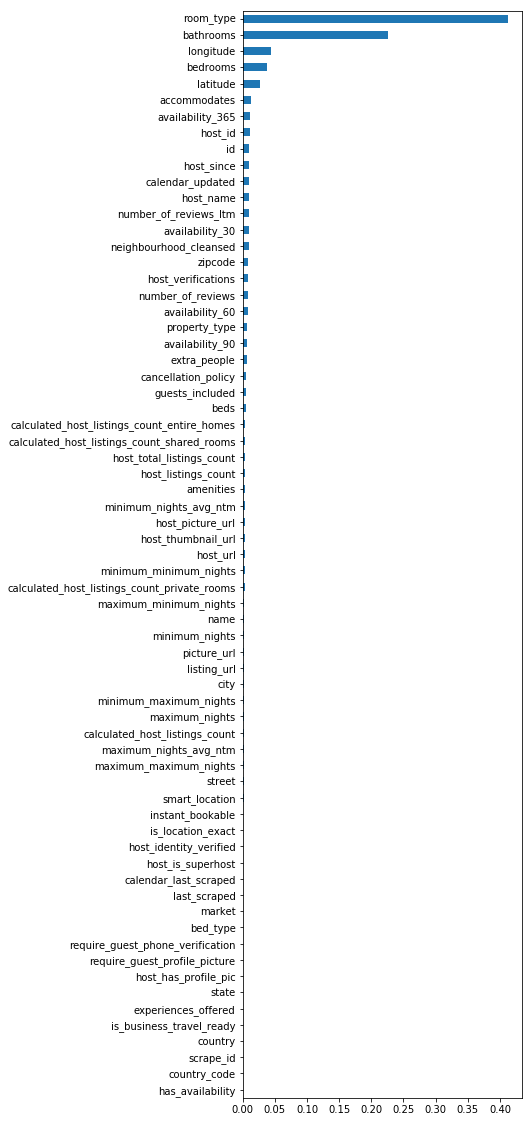

In [30]:
#it would be important to find a way to encode the 'amenities' variable 
import matplotlib.pyplot as plt 

figsize=(5, 20)
plt.figure(figsize=figsize)
importances = pd.Series(model.feature_importances_, X_test.columns).sort_values()
importances.plot.barh()

In [32]:
importances.sort_values().tail()

latitude     0.027545
bedrooms     0.037598
longitude    0.044687
bathrooms    0.226253
room_type    0.412804
dtype: float64